# Performing Grid Histogram Equalization
- This tutorial can be found at this [link](https://www.pygmt.org/latest/tutorials/advanced/grid_equalization.html)
- In this tutorial, we will be learning how to create a grid using statistics based on a cumulative distribution function.

In [1]:
import pygmt

### Loading Sample Data

In [2]:
grid = pygmt.datasets.load_earth_relief(
    resolution="03s", region=[-119.825, -119.4, 37.6, 37.825]
)
grid_dist = pygmt.grd2xyz(grid=grid, output_type="pandas")["elevation"]

In [3]:
print("Type of variable: ", type(grid_dist))
print("Number of values: ", len(grid_dist))
grid_dist.head()

Type of variable:  <class 'pandas.core.series.Series'>
Number of values:  138481


0    1536
1    1539
2    1542
3    1547
4    1546
Name: elevation, dtype: int64

### Plotting the original digital elevation model (DEM) and data distribution

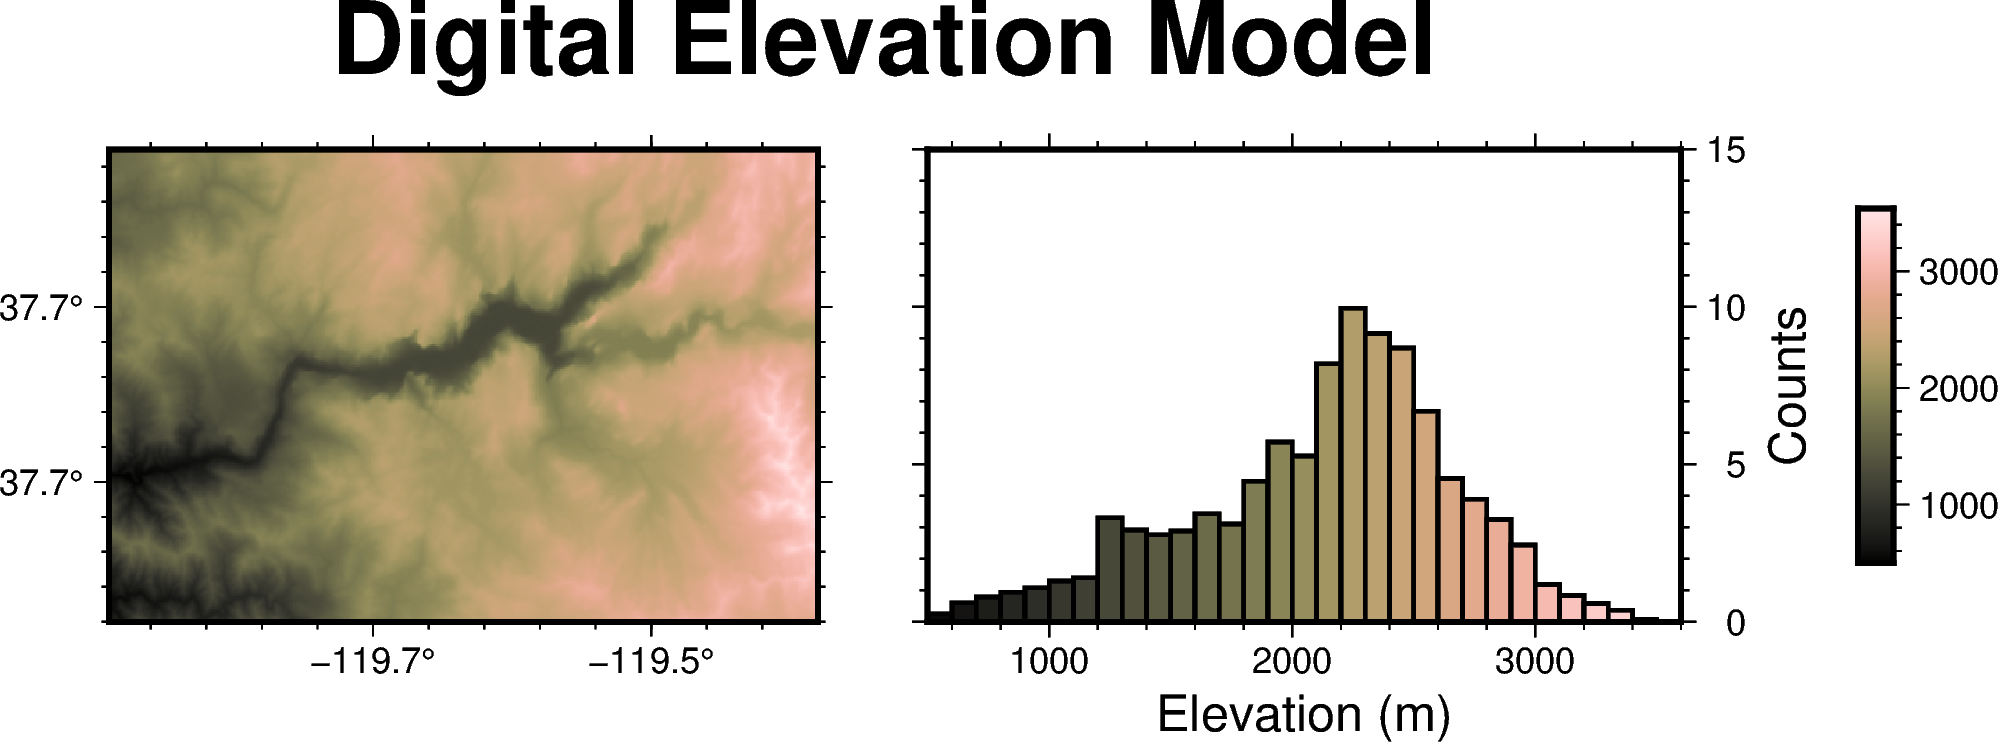

In [4]:
# Create an instance of the Figure class
fig = pygmt.Figure()
# Define figure configuration
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")
# Define the colormap for the figure
pygmt.makecpt(series=[500, 3540], cmap="turku")

# Setup subplots with two panels
with fig.subplot(
  nrows = 1, ncols = 2, figsize = ("13.5c", "4c"), title = "Digital Elevation Model"
):
  # Plot the original digital elevation model in the first panel
  with fig.set_panel(panel=0):
    fig.grdimage(grid=grid, projection="M?", frame="WSne", cmap=True)
    
  # Plot a histogram showing the z-value distribution in the original DEM
  with fig.set_panel(panel=1):
    fig.histogram(
      data=grid_dist, projection="X?",
      region=[500, 3600, 0, 15], series=[500, 3600, 100],
      frame=["wnSE", "xaf+lElevation (m)", "yaf+lCounts"],
      cmap=True, histtype=1, pen="1p,black",
    )
    fig.colorbar(position="JMR+o1.5c/0c+w3c/0.3c", frame=True)

fig.show()

### Equalizing grid based on a linear distribution
- Now, we will equalize the grid based on a linear distribution
- In this example, we will equalize the grid into nine divisions based on a linear distribution and produce a `pandas.Series` with the z-values for the new grid.

In [5]:
divisions = 9
linear = pygmt.grdhisteq.equalize_grid(grid=grid, divisions=divisions)
linear_dist = pygmt.grd2xyz(grid=linear, output_type="pandas")["z"]

### Calculating the bins used for data transformation

In [6]:
pygmt.grdhisteq.compute_bins(grid=grid, divisions=divisions)

,start,stop
bin_id,,
0,508.0,1352.0
1,1352.0,1719.0
2,1719.0,1972.0
3,1972.0,2156.0
4,2156.0,2270.0
5,2270.0,2391.0
6,2391.0,2520.0
7,2520.0,2739.0
8,2739.0,3533.0


### Plotting the equally distributed data

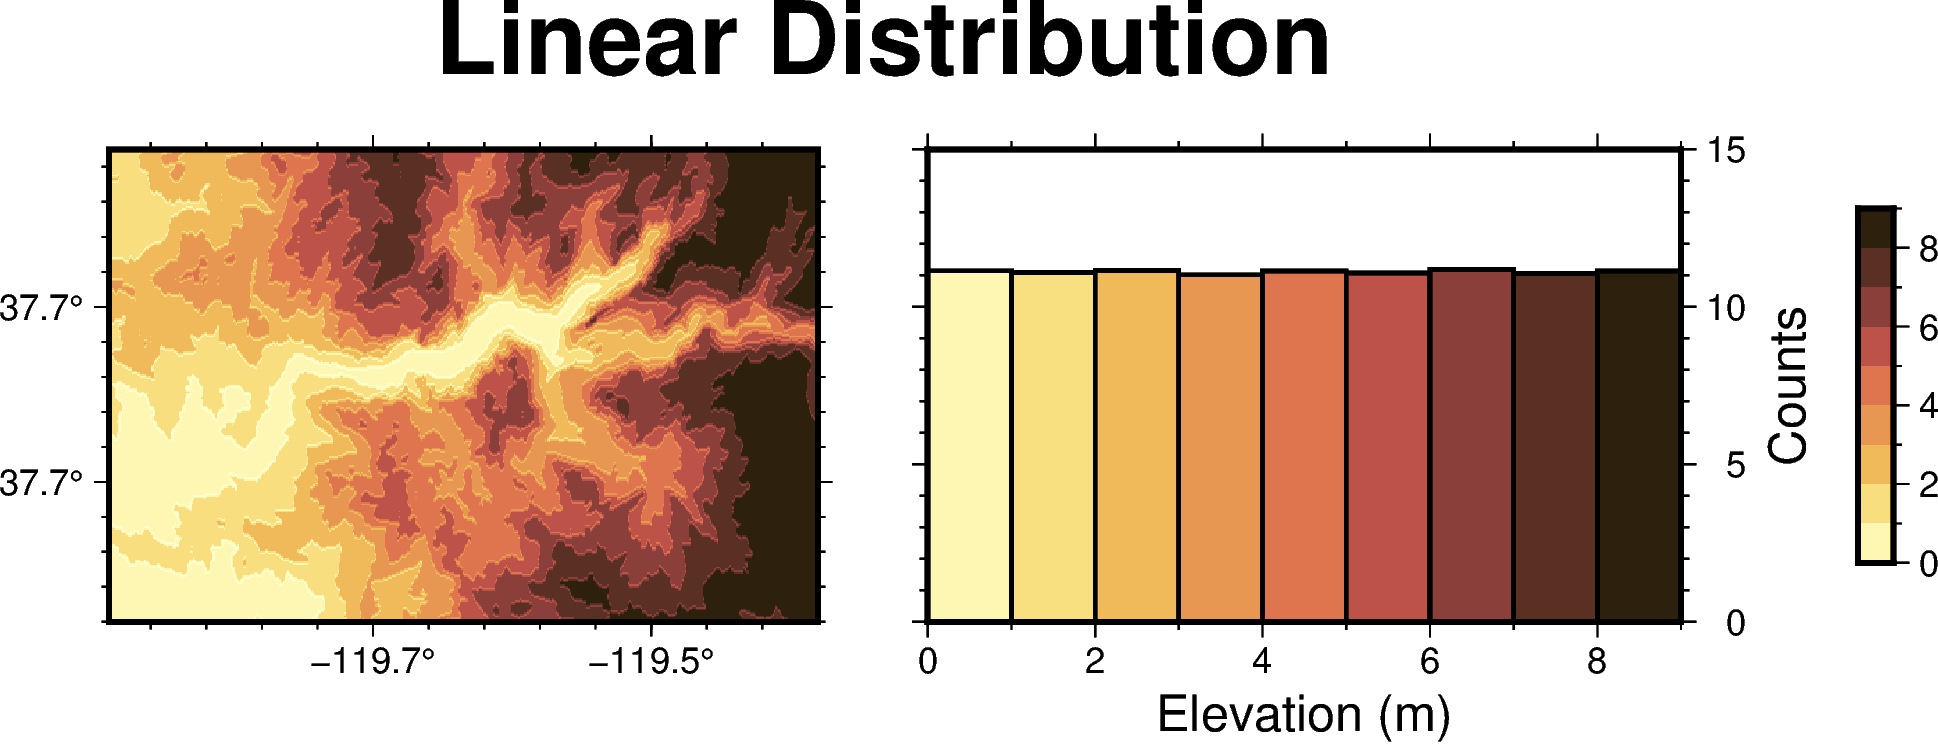

In [7]:
# Create an instance of the Figure class
fig = pygmt.Figure()
# Define figure configuration
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")
# Define the colormap for the figure
pygmt.makecpt(series=[0, divisions, 1], cmap="lajolla")

# Setup subplots with two panels
with fig.subplot(
  nrows = 1, ncols = 2, figsize = ("13.5c", "4c"), title = "Linear Distribution"
):
  # Plot the grid with a linear distribution in the first panel
  with fig.set_panel(panel=0):
    fig.grdimage(grid=linear, projection="M?", frame="WSne", cmap=True)
    
  # Plot a histogram showing the linear z-value distribution
  with fig.set_panel(panel=1):
    fig.histogram(
      data=linear_dist, projection="X?",
      region=[0, divisions, 0, 15], series=[0, divisions, 1],
      frame=["wnSE", "xaf+lElevation (m)", "yaf+lCounts"],
      cmap=True, histtype=1, pen="1p,black",
    )
    fig.colorbar(position="JMR+o1.5c/0c+w3c/0.3c", frame=True)

fig.show()

### Transform grid based on a normal distribution

In [8]:
normal = pygmt.grdhisteq.equalize_grid(grid=grid, gaussian=True)
normal_dist = pygmt.grd2xyz(grid=normal, output_type="pandas")["z"]

### Plotting the normally distributed data

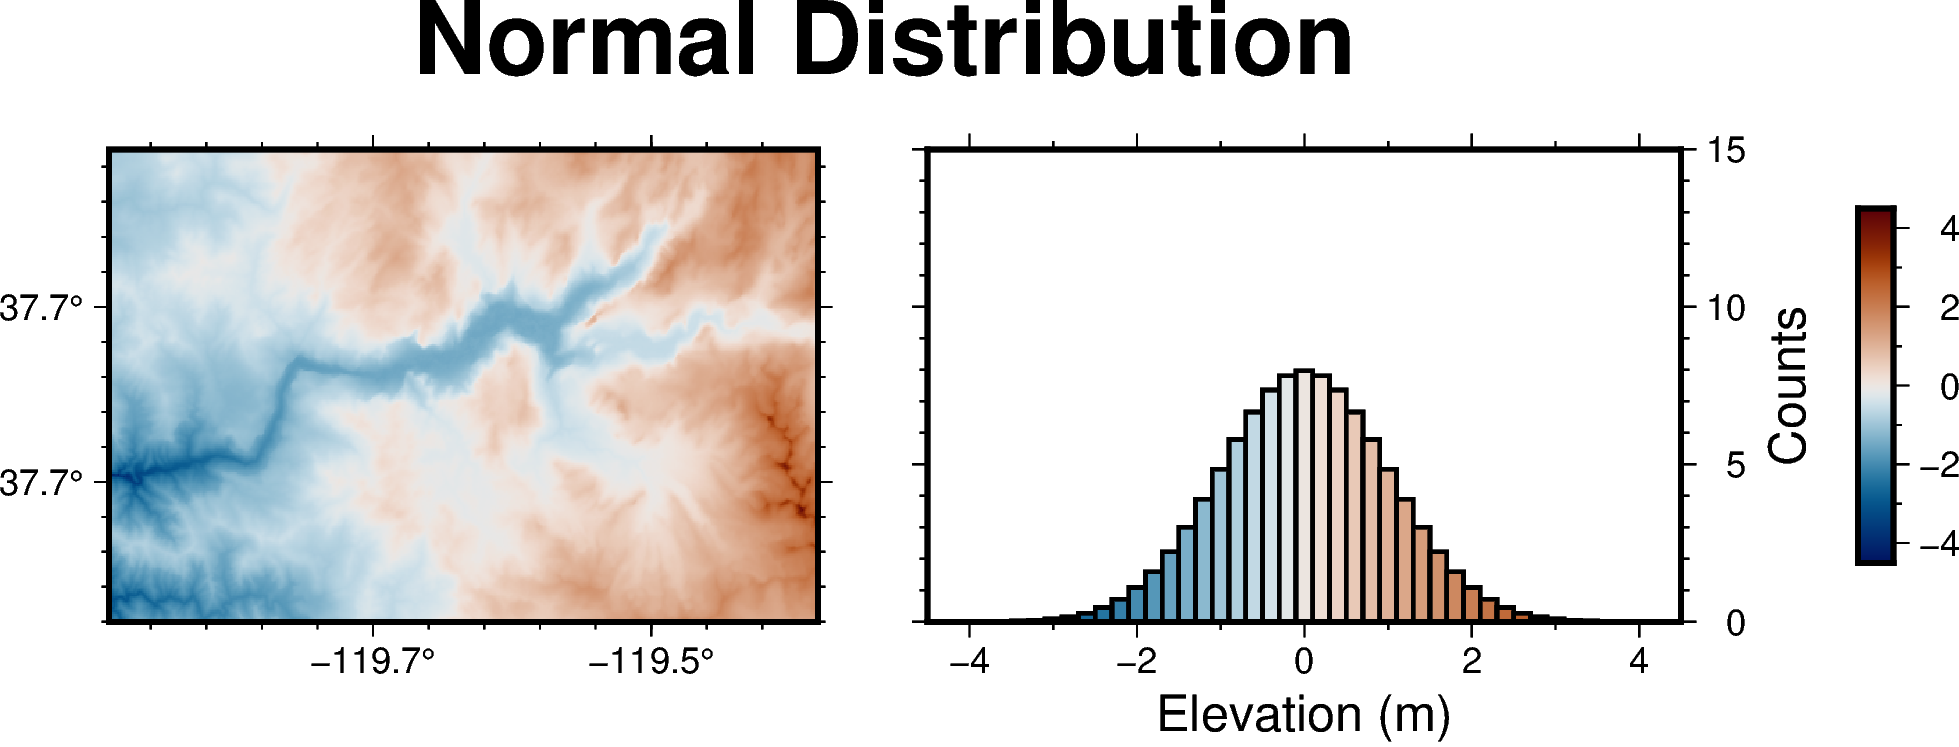

In [9]:
# Create an instance of the Figure class
fig = pygmt.Figure()
# Define figure configuration
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")
# Define the colormap for the figure
pygmt.makecpt(series=[-4.5, 4.5], cmap="vik")

# Setup subplots with two panels
with fig.subplot(
  nrows = 1, ncols = 2, figsize = ("13.5c", "4c"), title = "Normal Distribution"
):
  # Plot the grid with a normal distribution in the first panel
  with fig.set_panel(panel=0):
    fig.grdimage(grid=normal, projection="M?", frame="WSne", cmap=True)
    
  # Plot a histogram showing the normal z-value distribution
  with fig.set_panel(panel=1):
    fig.histogram(
      data=normal_dist, projection="X?",
      region=[-4.5, 4.5, 0, 15], series=[-4.5, 4.5, 0.2],
      frame=["wnSE", "xaf+lElevation (m)", "yaf+lCounts"],
      cmap=True, histtype=1, pen="1p,black",
    )
    fig.colorbar(position="JMR+o1.5c/0c+w3c/0.3c", frame=True)

fig.show()

### Equalizing grid based on a quadratic distribution

In [10]:
quadratic = pygmt.grdhisteq.equalize_grid(
    grid=grid, quadratic=True, divisions=divisions
)
quadratic_dist = pygmt.grd2xyz(grid=quadratic, output_type="pandas")["z"]

### Calculating the bins used for data transformation

In [11]:
pygmt.grdhisteq.compute_bins(grid=grid, divisions=divisions, quadratic=True)

,start,stop
bin_id,,
0,508.0,1155.0
1,1155.0,1375.0
2,1375.0,1605.0
3,1605.0,1821.0
4,1821.0,1972.0
5,1972.0,2131.0
6,2131.0,2245.0
7,2245.0,2391.0
8,2391.0,3533.0


### Plot the quadratic distribution of data

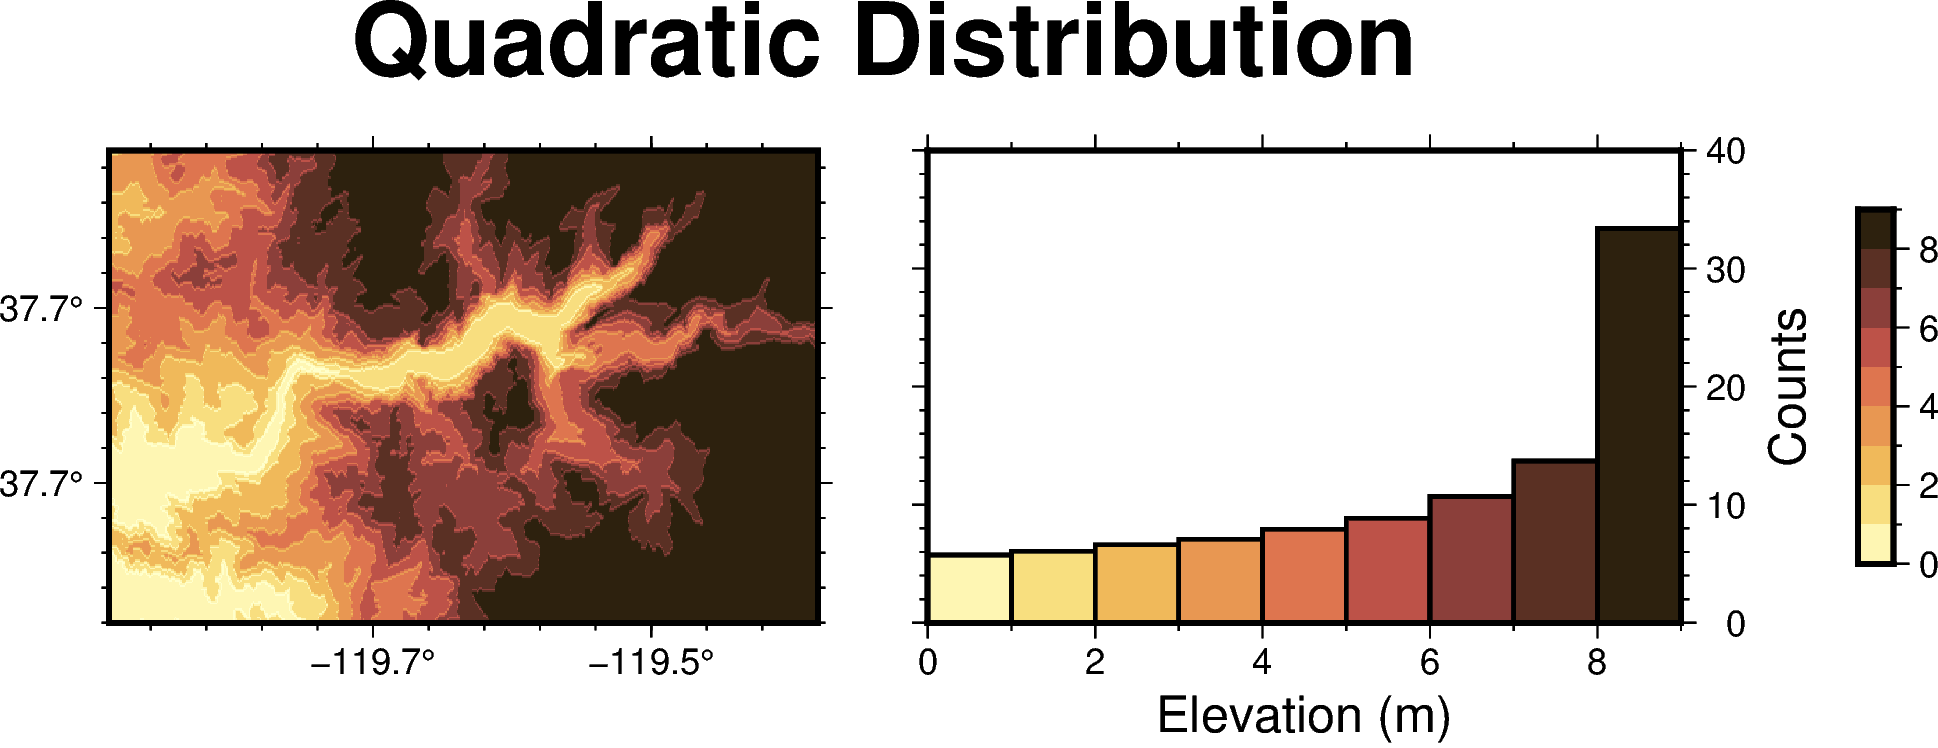

In [12]:
# Create an instance of the Figure class
fig = pygmt.Figure()
# Define figure configuration
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")
# Define the colormap for the figure
pygmt.makecpt(series=[0, divisions, 1], cmap="lajolla")

# Setup subplots with two panels
with fig.subplot(
  nrows = 1, ncols = 2, figsize = ("13.5c", "4c"), title = "Quadratic Distribution"
):
  # Plot the grid with a quadratic distribution in the first panel
  with fig.set_panel(panel=0):
    fig.grdimage(grid=quadratic, projection="M?", frame="WSne", cmap=True)
    
  # Plot a histogram showing the quadratic z-value distribution
  with fig.set_panel(panel=1):
    fig.histogram(
      data=quadratic_dist, projection="X?",
      region=[0, divisions, 0, 40], series=[0, divisions, 1],
      frame=["wnSE", "xaf+lElevation (m)", "yaf+lCounts"],
      cmap=True, histtype=1, pen="1p,black",
    )
    fig.colorbar(position="JMR+o1.5c/0c+w3c/0.3c", frame=True)

fig.show()